In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

In [2]:
%run Jean.ipynb
data = data_clean

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Correlations

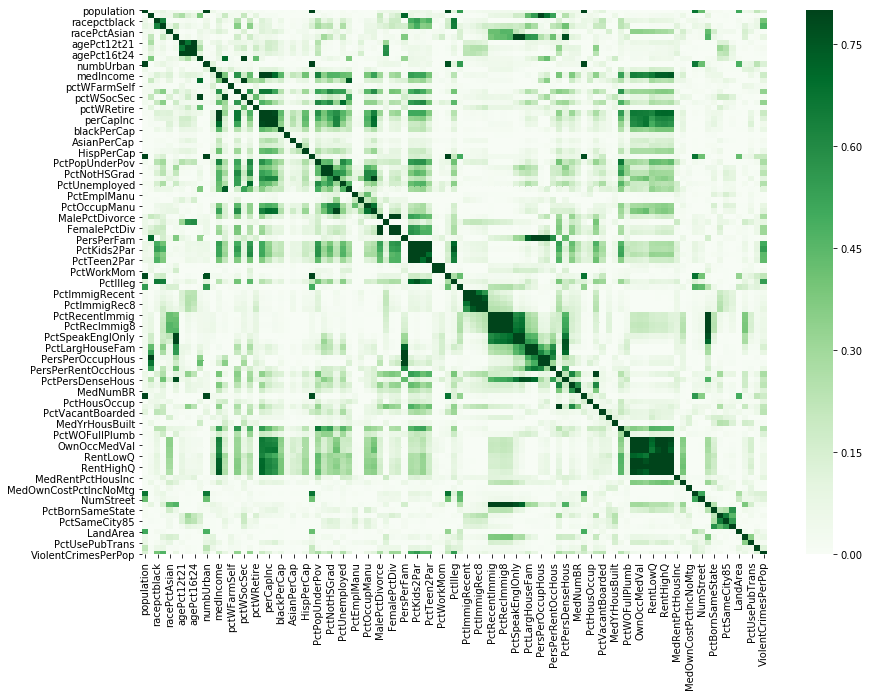

In [36]:
import seaborn as sns

corrmat = (data.corr())**2
fig = plt.figure(figsize = (14, 10))

sns.heatmap(corrmat, vmax = 0.8, cmap='Greens')
plt.show()

In [4]:
corrT = (data.corr())**2
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'], ascending=False)
corrT['ViolentCrimesPerPop'].head(8)

ViolentCrimesPerPop    1.000000
PctKids2Par            0.545457
PctIlleg               0.544440
PctFam2Par             0.499646
racePctWhite           0.468645
PctYoungKids2Par       0.443801
PctTeen2Par            0.437991
racepctblack           0.398818
Name: ViolentCrimesPerPop, dtype: float64

# PCA

In [33]:
# Train and test sets

X = data.iloc[:,0:100].values
y = data.iloc[:,100].values

#Standardize
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


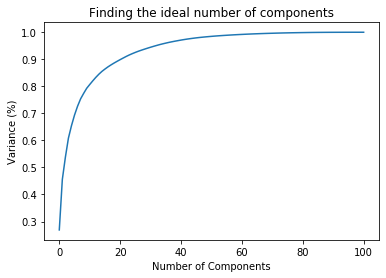

In [34]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Finding the ideal number of components')
plt.show()

In [35]:
c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


print("Percentage of variance explained : %s" % sum(pca.explained_variance_).round(2),"%")


Percentage of variance explained : 83.76 %


## Regular Linear Degression

Coefficients: 
 [-0.02897617  0.01737544  0.01393117 -0.01725388  0.00515704 -0.00579851
 -0.01380328 -0.03433452  0.00342029 -0.00972748  0.01390625  0.01337861
 -0.00443027  0.00878747]
Mean squared error: 0.02
Coefficient of determination: 0.63


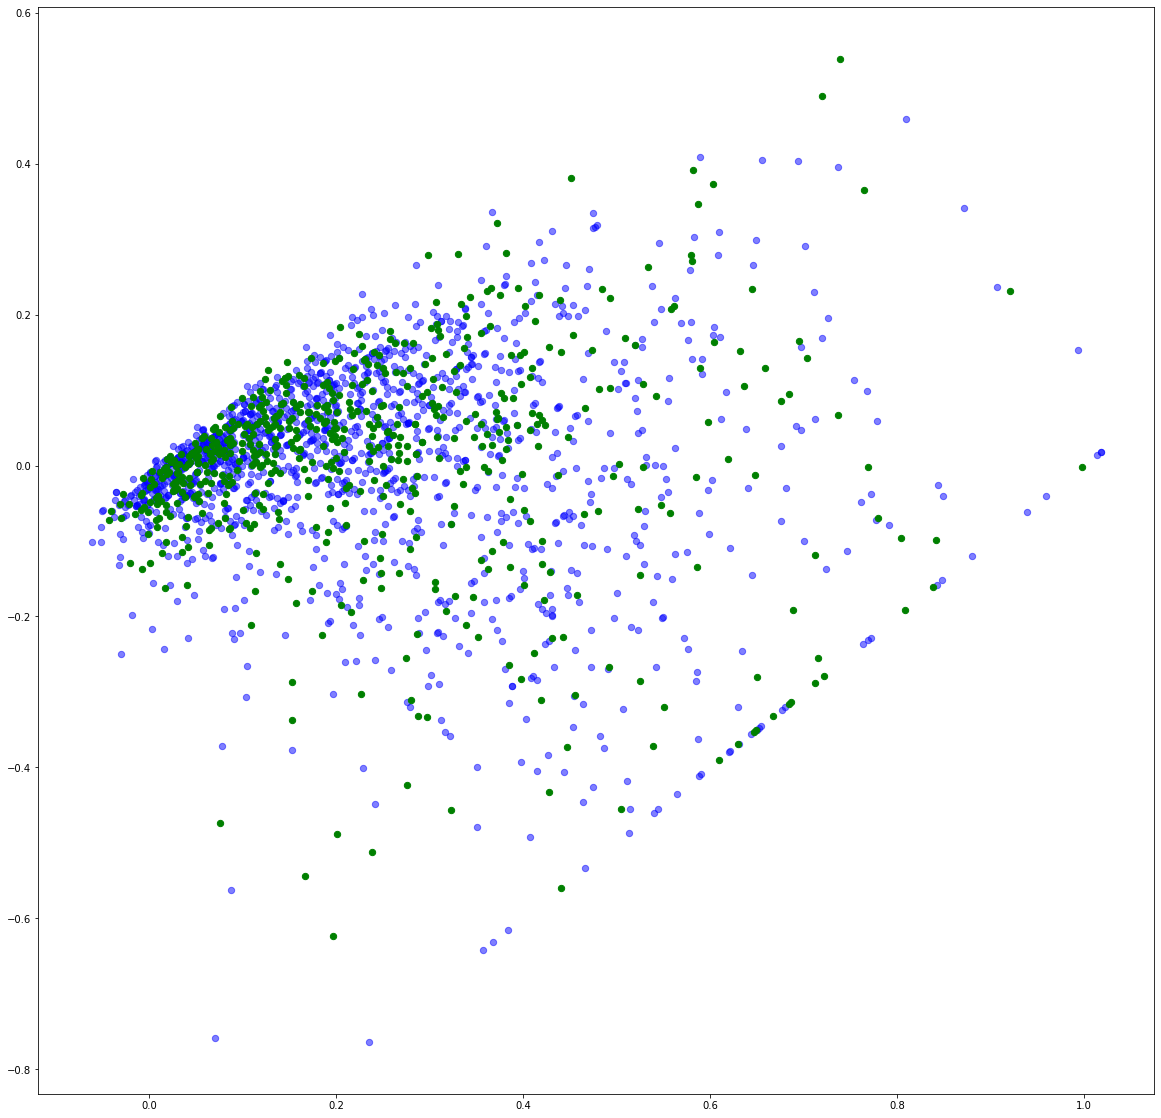

In [37]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


##https://stats.stackexchange.com/questions/310766/dealing-with-outliers-with-linear-regression


y_train_predict = regr.predict(X_train)
y_test_predict = regr.predict(X_test)

plt.figure(figsize=(20, 20))
plt.scatter(y_train_predict, y_train_predict - y_train, c='b', s=40, alpha=0.5)
plt.scatter(y_test_predict, y_test_predict - y_test, c = 'g', s=40)

plt.show()